## Data Science Course
### Regression
#### Author: Pawel Jelonek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1

#### a) Create and train simple regression model of sqft_living to price.  

In [3]:
X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]
model = LinearRegression()
model.fit(X=X,y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### b) Evaluate and visualise created model.

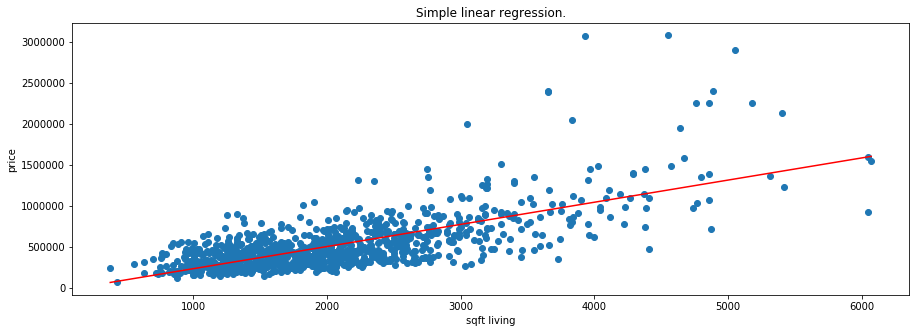

Mean squared error equals: 57947526161.28837
0.496708801663114


In [4]:
plt.figure(figsize=(15,5))
plt.scatter(X,y)
plt.xlabel("sqft living")
plt.ylabel("price")

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = [model.intercept_ + model.coef_*x for x in x_model]

plt.plot(x_model,y_model,c='red')
plt.title("Simple linear regression.")
plt.show()

y_pred = model.predict(X)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred,y)))
print(model.score(X,y))

#### c) Create and plot higher order polynomial regression models.

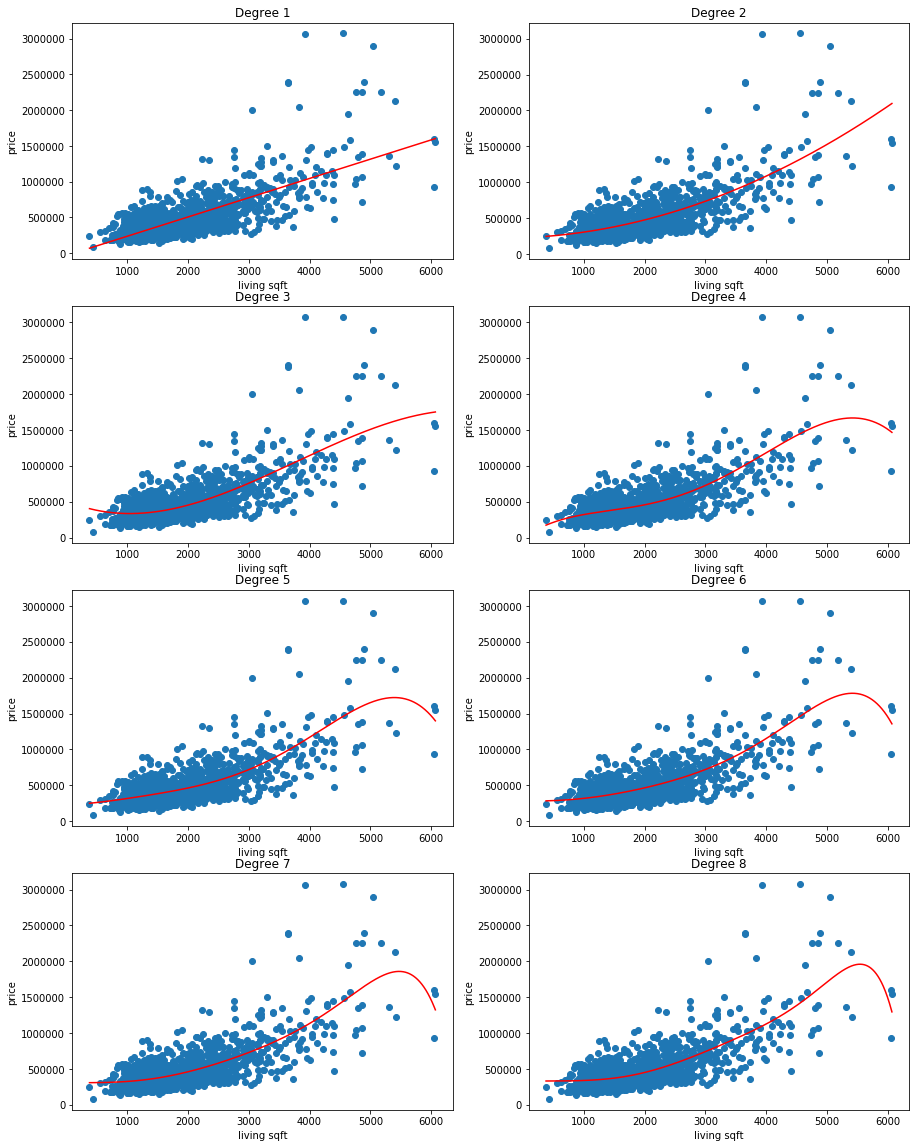

In [5]:
plt.figure(figsize=(15,20))
definition_errors = []
test_errors = []

for order in range(1,9):
    plt.subplot(4,2,order)
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    model = LinearRegression() 
    _= model.fit(X_order, y) 
    
    y_pred = model.predict(X_order)
    definition_errors.append(mean_squared_error(y_pred, y))
    test_errors.append(model.score(X_order, y))
    
    plt.scatter(X, y)
    plt.xlabel("living sqft")
    plt.ylabel("price")
    
    x_model = np.linspace(np.min(X), np.max(X), 1000)
    y_model = [model.intercept_ + np.dot(model.coef_, np.power(x, range(1,order+1))) for x in x_model]
    
    plt.plot(x_model, y_model, c="red")
    plt.title("Degree " + str(order))

plt.show()

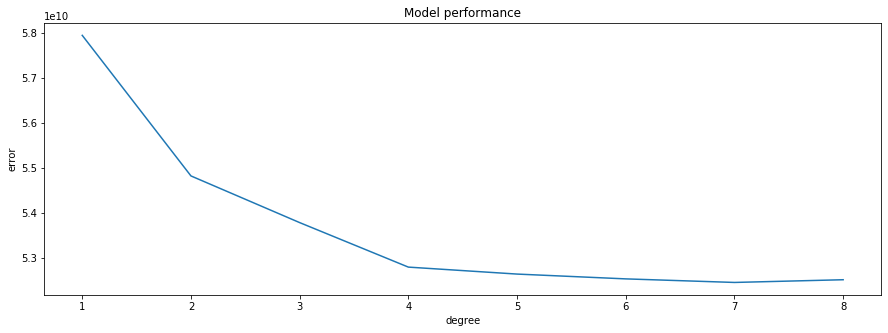

In [6]:
plt.figure(figsize=(15,5))

plt.plot(range(1,9) , definition_errors)

plt.xlabel("degree")
plt.ylabel("error")

plt.title("Model performance")
plt.show()

## Exercise 2
#### In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

<Figure size 1080x1440 with 0 Axes>

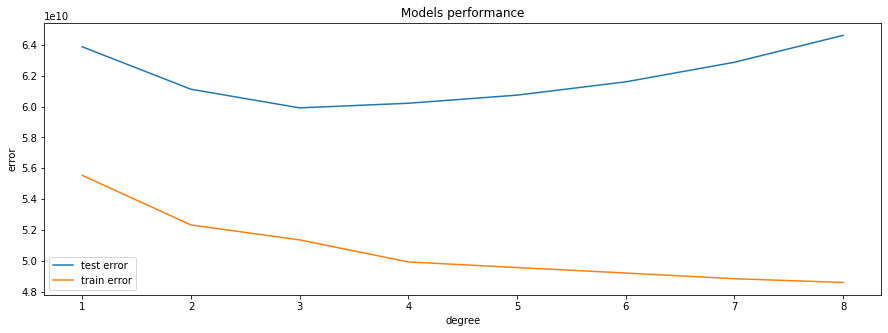

In [7]:
plt.figure(figsize=(15,20))
errors = []
errors_train = []

for order in range(1,9):
    
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    model = LinearRegression() 
    _= model.fit(X_train, y_train) 
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    errors.append(mean_squared_error(y_pred, y_test))
    errors_train.append(mean_squared_error(y_pred_train, y_train))
    
plt.figure(figsize=(15,5))

plt.plot(range(1,9), errors, label = "test error")
plt.plot(range(1,9), errors_train, label = "train error")

plt.xlabel("degree")
plt.ylabel("error")

plt.title("Models performance")
plt.legend()
plt.show()

## Exercise 3
#### a) Train model to predict sqft_living for a given house price. Plot predictions.  

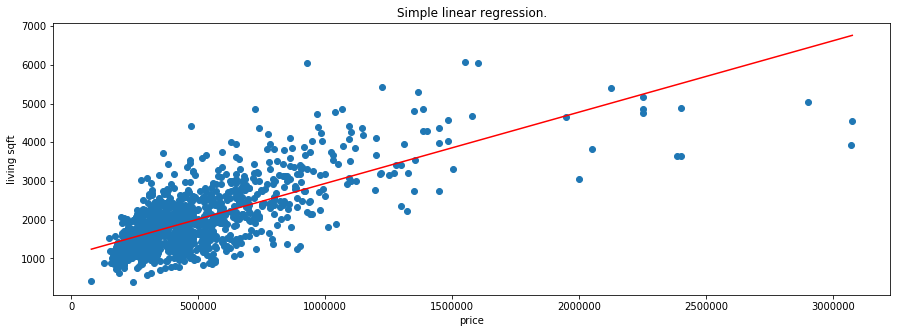

Mean squared error equals: 396407.1889615158


In [8]:
X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression() 
_= model.fit(X, y) 

plt.figure(figsize=(15,5))

plt.scatter( X, y)
plt.xlabel("price")
plt.ylabel("living sqft")

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = [model.intercept_ + model.coef_*x for x in x_model]
    
plt.plot(x_model, y_model, c="red")
plt.title("Simple linear regression.")
plt.show()

y_pred = model.predict(X)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y)))

#### b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

#### Proposed one vs mine

In [9]:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))
teacher_result = mean_squared_error(y_pred, y_test)


X = house_df[['sqft_living', 'sqft_lot', 'grade','yr_renovated','yr_built','lat','long']].values.reshape(-1,7)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))
print("My model is better about {0}".format(teacher_result / mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749581797.04599
Mean squared error equals: 42856241544.16684
My model is better about 1.137514164577535
